# Cattle prices (with Peter Solar)
29 November 2024

May Fairs: This dataset on cattle prices at fairs held in the month of May has 3766 observations spread across four types of beasts: 

|                |      |
|----------------|------|
| One year old   | 1084 |
| Two  year old  | 1136 |
| Three year old |  809 |
| Stripper (*)       |  737 |


(*) Strippers were cows that lost their calves and were generally sold off for fattening. 

The data cover the period from 1818 to 1890, but are quite sparse before 1840.  In what follows it might best to stick to the period from 1840 to 1890.

The variables, by column, in the spreadsheet, are:

|               |                           |
|---------------|---------------------------|
| source_obs	| ignore (for my reference) |  
| newspaper     | ignore (for my reference)  |
| year	        | year in which price observed |
| month	        | month in which price observed (here always 5 = May) |
| fair	        | fair at which price observed |
| type	        | type of beast |
| type_std      | standardized type of beast (use this!) |
| price_low     | price at low end of price range |
| price_high    | price at high end of price range |
| county        | county in Ireland (31 of the 32 in total) |
| region        | region in Ireland (5 regions) |

It might be useful and a way of familiarizing yourself with the data to generate some descriptive statistics, for example:

- the number of observations annually:
    * for the four types of beasts
    * for each region by type of beast
- the average price range (price_high/price_low) annually:
    * for the four types of beasts
    * for each region by type of beast

Similarly, you might want to create some easy time series for prices using the mean of all observations for "price_low" and "price_high" for:
- the four types of beasts
- the four types of beasts by region

Once we have a look at these statistics, we can think about where to go with the research.''

In [1]:
import pandas as pd    # imports the pandas library and assigns it the alias pd

In [2]:
help('read_excel')

No Python documentation found for 'read_excel'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [3]:
# pip install openpyxl    # I had to install openpyxl to get pd.read_excel to work

In [4]:
df = pd.read_excel('/Users/luchens/Documents/research/_cattle/may_fairs.xlsx')  

## Generate new variables: `price_ratio` = price_high/price_low , `price_midpoint` =  (price_high + price_low)/2

In [5]:
df["price_ratio"] = df["price_high"] / df["price_low"]
df["price_midpoint"] = (df["price_high"] + df["price_low"])/2
display(df)

,source_obs,newspaper,year,month,fair,type,type_std,price_low,price_high,county,region,price_ratio,price_midpoint
0,2396.0,Farmer's Gazette,1886,5,Abbeyfeale,1y,one year old,4.0,7.0,Limerick,Southwest,1.750000,5.50
1,1601.0,Farmer's Gazette,1877,5,Ahascragh,1y,one year old,5.5,8.0,Galway,West Midlands,1.454545,6.75
2,2517.0,Farmer's Gazette,1888,5,Antrim,1y,one year old,4.0,7.0,Antrim,North,1.750000,5.50
3,2576.0,Farmer's Gazette,1889,5,Antrim,1y,one year old,4.5,7.0,Antrim,North,1.555556,5.75
4,NaN,Freeman's Journal,1842,5,Ardagh,1y,one year old,2.5,4.0,Limerick,Southwest,1.600000,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,1125.0,Farmer's Gazette,1872,5,Wicklow,2y,two year old,10.0,12.5,Wicklow,Southeast,1.250000,11.25
3762,1204.0,Farmer's Gazette,1873,5,Wicklow,2y,two year old,11.0,13.0,Wicklow,Southeast,1.181818,12.00
3763,2112.0,Farmer's Gazette,1883,5,Wicklow,2y,two year old,13.0,15.5,Wicklow,Southeast,1.192308,14.25
3764,2660.0,Farmer's Gazette,1890,5,Wicklow,2y,two year old,13.0,14.0,Wicklow,Southeast,1.076923,13.50


## Change the `year` and `month` variables to one `datetime` variable:
E.g. convert year (1830) and month (5) to a datetime variable: 1830-05-01 

In [6]:
import datetime
print (pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m'))

0      1886-05-01
1      1877-05-01
2      1888-05-01
3      1889-05-01
4      1842-05-01
          ...    
3761   1872-05-01
3762   1873-05-01
3763   1883-05-01
3764   1890-05-01
3765   1889-05-01
Length: 3766, dtype: datetime64[ns]


In [7]:
df["datetime"] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

In [8]:
df.dtypes

source_obs               float64
newspaper                 object
year                       int64
month                      int64
fair                      object
type                      object
type_std                  object
price_low                float64
price_high               float64
county                    object
region                    object
price_ratio              float64
price_midpoint           float64
datetime          datetime64[ns]
dtype: object

In [9]:
a = df.type_std.value_counts()   
print(a)

type_std
two year old      1136
one year old      1084
three year old     809
stripper           737
Name: count, dtype: int64


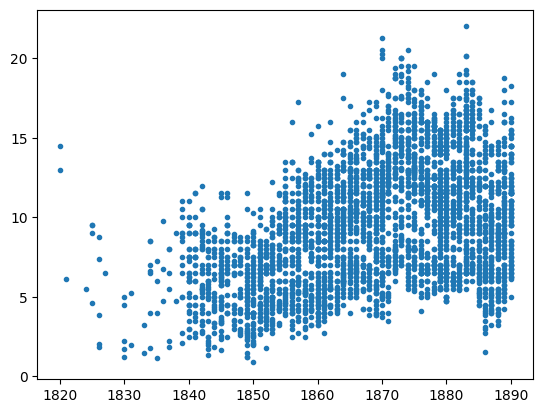

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(df.year,df.price_midpoint, marker = '.')

In [11]:
df.describe(include='all')

,source_obs,newspaper,year,month,fair,type,type_std,price_low,price_high,county,region,price_ratio,price_midpoint,datetime
count,2875.000000,3766,3766.000000,3766.000000,3766,3766,3766,3766.000000,3766.000000,3766,3766,3766.000000,3766.000000,3766
unique,NaN,74,NaN,NaN,330,15,4,NaN,NaN,32,5,NaN,NaN,NaN
top,NaN,Farmer's Gazette,NaN,NaN,Clonmel,2y,two year old,NaN,NaN,Tipperary,West Midlands,NaN,NaN,NaN
freq,NaN,2505,NaN,NaN,100,1085,1136,NaN,NaN,377,887,NaN,NaN,NaN
mean,1196.023304,NaN,1869.078864,5.004514,NaN,NaN,NaN,8.227742,10.974259,NaN,NaN,1.391285,9.601000,1869-05-29 19:45:43.494424576
min,1.000000,NaN,1820.000000,5.000000,NaN,NaN,NaN,0.750000,1.000000,NaN,NaN,1.000000,0.875000,1820-05-01 00:00:00
25%,448.500000,NaN,1859.000000,5.000000,NaN,NaN,NaN,5.500000,8.000000,NaN,NaN,1.220997,6.500000,1859-05-01 00:00:00
50%,1156.000000,NaN,1871.000000,5.000000,NaN,NaN,NaN,8.000000,11.000000,NaN,NaN,1.333333,9.500000,1871-05-01 00:00:00
75%,1896.500000,NaN,1880.000000,5.000000,NaN,NaN,NaN,11.000000,14.000000,NaN,NaN,1.500000,12.250000,1880-05-01 00:00:00
max,2665.000000,NaN,1890.000000,6.000000,NaN,NaN,NaN,20.000000,26.000000,NaN,NaN,5.555556,22.000000,1890-05-01 00:00:00


In [12]:
a = df.month.value_counts()   
print(a)

month
5    3749
6      17
Name: count, dtype: int64


(Note that for 17 cases, month = 6)

In [13]:
a = df.type_std.value_counts()   
print(a)

type_std
two year old      1136
one year old      1084
three year old     809
stripper           737
Name: count, dtype: int64


The number of observations annually for the four types of beasts:

In [14]:
pd.crosstab(index=df['year'], columns=df['type_std'],margins=True)

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1820,0,1,0,1,2
1821,0,0,0,1,1
1824,0,1,0,0,1
1825,1,1,1,1,4
1826,1,2,0,2,5
...,...,...,...,...,...
1887,29,14,21,28,92
1888,24,18,23,26,91
1889,26,13,19,25,83


## The number of observations annually for each region by type of beast: 

In [15]:
a = df.region.value_counts()   
print(a)

region
West Midlands    887
Southeast        845
Southwest        728
East Midlands    725
North            581
Name: count, dtype: int64


### West Midlands: 

In [16]:
west_midlands_df = df[df["region"] == "West Midlands"]
display(west_midlands_df)

,source_obs,newspaper,year,month,fair,type,type_std,price_low,price_high,county,region,price_ratio,price_midpoint,datetime
1,1601.0,Farmer's Gazette,1877,5,Ahascragh,1y,one year old,5.5,8.000,Galway,West Midlands,1.454545,6.7500,1877-05-01
38,40.0,Freeman's Journal,1857,5,Athenry,1y,one year old,3.0,4.500,Galway,West Midlands,1.500000,3.7500,1857-05-01
39,523.0,Farmer's Gazette,1864,5,Athenry,1y,one year old,5.0,7.000,Galway,West Midlands,1.400000,6.0000,1864-05-01
40,808.0,Farmer's Gazette,1868,5,Athenry,1y,one year old,5.0,7.000,Galway,West Midlands,1.400000,6.0000,1868-05-01
41,2421.0,Farmer's Gazette,1887,5,Athenry,1y,one year old,4.0,5.500,Galway,West Midlands,1.375000,4.7500,1887-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,NaN,Dublin Evening Post,1862,5,Tyrellspass,2y,two year old,7.5,11.125,Westmeath,West Midlands,1.483333,9.3125,1862-05-01
3712,490.0,Farmer's Gazette,1863,5,Tyrellspass,2y,two year old,8.5,11.250,Westmeath,West Midlands,1.323529,9.8750,1863-05-01
3713,703.0,Farmer's Gazette,1866,5,Tyrellspass,2y,two year old,9.5,11.000,Westmeath,West Midlands,1.157895,10.2500,1866-05-01
3749,1016.0,Farmer's Gazette,1870,5,Westport,2y,two year old,8.5,13.500,Mayo,West Midlands,1.588235,11.0000,1870-05-01


In [17]:
pd.crosstab(index=west_midlands_df['year'], columns=west_midlands_df['type_std'],margins=True)
# crosstab omits years with zero counts for all types; I can generate a time series, too.

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1834,0,1,0,1,2
1835,1,1,0,0,2
1836,0,1,0,0,1
1840,0,1,0,1,2
1841,0,2,0,0,2
1842,1,1,0,1,3
1845,0,1,0,0,1
1846,3,3,2,2,10
1848,1,2,1,2,6


### Southeast:

In [18]:
southeast_df = df[df["region"] == "Southeast"]
pd.crosstab(index=southeast_df['year'], columns=southeast_df['type_std'],margins=True)
# crosstab omits years with zero counts for all types

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1824,0,1,0,0,1
1825,0,0,1,1,2
1826,1,2,0,1,4
1827,0,1,0,0,1
1830,1,1,0,1,3
...,...,...,...,...,...
1887,1,1,1,1,4
1888,2,3,3,3,11
1889,4,3,4,4,15


### Southwest:

In [19]:
southwest_df = df[df["region"] == "Southwest"]
pd.crosstab(index=southwest_df['year'], columns=southwest_df['type_std'],margins=True)
# crosstab omits years with zero counts for all types

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1821,0,0,0,1,1
1825,1,1,0,0,2
1836,0,1,0,0,1
1839,1,2,0,2,5
1840,4,8,2,4,18
1841,3,6,1,4,14
1842,3,10,0,5,18
1843,4,6,0,5,15
1844,7,5,0,7,19


### East Midlands: 

In [20]:
east_midlands_df = df[df["region"] == "East Midlands"]
pd.crosstab(index=east_midlands_df['year'], columns=east_midlands_df['type_std'],margins=True)
# crosstab omits years with zero counts for all types

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1820,0,1,0,1,2
1826,0,0,0,1,1
1830,1,1,0,0,2
1834,0,1,0,0,1
1837,1,2,0,1,4
1838,0,1,0,0,1
1839,0,1,0,1,2
1840,1,0,1,0,2
1843,0,0,0,1,1


In [21]:
df["price_ratio"] = df["price_high"] / df["price_low"]
df.head(10)

,source_obs,newspaper,year,month,fair,type,type_std,price_low,price_high,county,region,price_ratio,price_midpoint,datetime
0,2396.0,Farmer's Gazette,1886,5,Abbeyfeale,1y,one year old,4.00,7.00,Limerick,Southwest,1.750000,5.500,1886-05-01
1,1601.0,Farmer's Gazette,1877,5,Ahascragh,1y,one year old,5.50,8.00,Galway,West Midlands,1.454545,6.750,1877-05-01
2,2517.0,Farmer's Gazette,1888,5,Antrim,1y,one year old,4.00,7.00,Antrim,North,1.750000,5.500,1888-05-01
3,2576.0,Farmer's Gazette,1889,5,Antrim,1y,one year old,4.50,7.00,Antrim,North,1.555556,5.750,1889-05-01
4,NaN,Freeman's Journal,1842,5,Ardagh,1y,one year old,2.50,4.00,Limerick,Southwest,1.600000,3.250,1842-05-01
5,NaN,Clare Journal,1843,5,Ardagh,1y,one year old,1.75,2.75,Limerick,Southwest,1.571429,2.250,1843-05-01
6,1185.0,Farmer's Gazette,1844,5,Ardagh,y,one year old,2.75,4.00,Limerick,Southwest,1.454545,3.375,1844-05-01
7,NaN,Limerick Chronicle,1845,5,Ardagh,1y,one year old,3.00,4.25,Limerick,Southwest,1.416667,3.625,1845-05-01
8,NaN,Statesman,1846,5,Ardagh,1y,one year old,2.75,5.25,Limerick,Southwest,1.909091,4.000,1846-05-01
9,NaN,Limerick Chronicle,1848,5,Ardagh,1y,one year old,2.10,3.15,Limerick,Southwest,1.500000,2.625,1848-05-01


### North: 

In [22]:
north_df = df[df["region"] == "North"]
pd.crosstab(index=north_df['year'], columns=north_df['type_std'],margins=True)
# crosstab omits years with zero counts for all types

type_std,one year old,stripper,three year old,two year old,All
year,,,,,
1834,1,1,0,0,2
1841,1,1,0,1,3
1843,1,1,0,0,2
1845,1,0,0,2,3
1846,1,1,0,1,3
1849,1,3,0,1,5
1850,1,1,0,1,3
1851,0,2,1,2,5
1853,2,2,0,3,7


## The average price ratio (price_high/price_low) annually for the four types of beasts:

(Peter refers to: "average price range"; I assume: for each of the four types of beasts, the average (over all cases for a given year) of the price ratio (annual data)

In [23]:
a = df.groupby(["type_std", "datetime"])["price_ratio"].mean()
print(a)

type_std      datetime  
one year old  1825-05-01    1.312500
              1826-05-01    1.176471
              1830-05-01    2.000000
              1833-05-01    2.000000
              1834-05-01    1.533333
                              ...   
two year old  1886-05-01    1.325022
              1887-05-01    1.283179
              1888-05-01    1.288959
              1889-05-01    1.256520
              1890-05-01    1.234748
Name: price_ratio, Length: 251, dtype: float64


In [24]:
a = df.groupby(["type_std", "region", "datetime"])["price_ratio"].mean()
print(a)

type_std      region         datetime  
one year old  East Midlands  1830-05-01    2.500000
                             1837-05-01    2.000000
                             1840-05-01    1.625000
                             1846-06-01    1.050000
                             1850-05-01    1.458333
                                             ...   
two year old  West Midlands  1886-05-01    1.823529
                             1887-05-01    1.280972
                             1888-05-01    1.411111
                             1889-05-01    1.342593
                             1890-05-01    1.287500
Name: price_ratio, Length: 929, dtype: float64


In [25]:
import numpy as np
np.savetxt("a.csv", a, delimiter=",")

## Time series for prices:

Time series for prices using the mean of all observations for "price_low" and "price_high" for the four types of beasts:

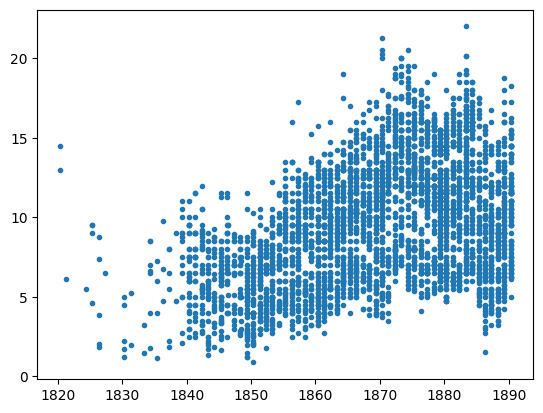

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df.datetime,df.price_midpoint, marker = '.')

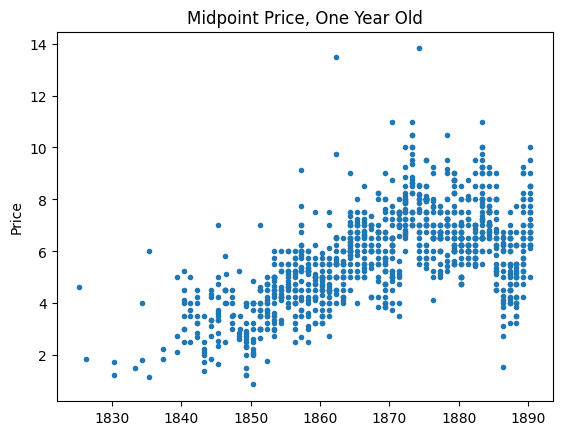

In [27]:
one_year_old_df = df[df["type_std"] == "one year old"]
plt.title("Midpoint Price, One Year Old") # add title
plt.xlabel("")  # add label to x-axis
plt.ylabel("Price")  # add label to y-axis
plt.scatter(one_year_old_df.datetime,one_year_old_df.price_midpoint, marker = '.')

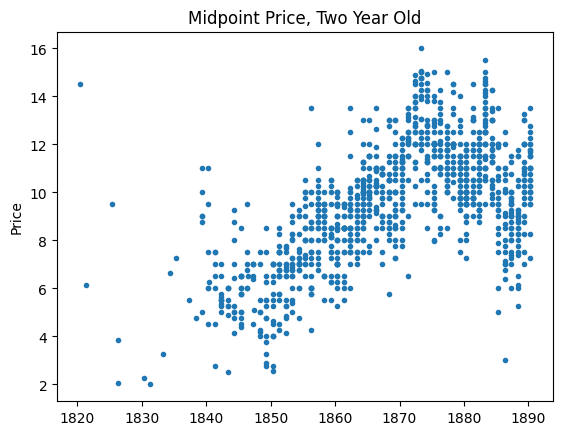

In [28]:
two_year_old_df = df[df["type_std"] == "two year old"]
plt.title("Midpoint Price, Two Year Old") # add title
plt.xlabel("")  # add label to x-axis
plt.ylabel("Price")  # add label to y-axis
plt.scatter(two_year_old_df.datetime,two_year_old_df.price_midpoint, marker = '.')

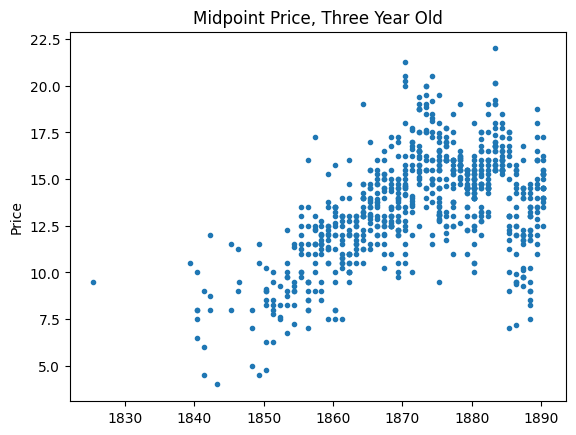

In [29]:
three_year_old_df = df[df["type_std"] == "three year old"]
plt.title("Midpoint Price, Three Year Old") # add title
plt.xlabel("")  # add label to x-axis
plt.ylabel("Price")  # add label to y-axis
plt.scatter(three_year_old_df.datetime,three_year_old_df.price_midpoint, marker = '.')

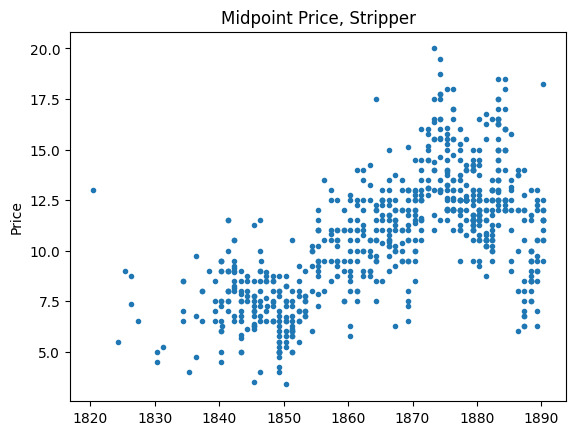

In [30]:
stripper_df = df[df["type_std"] == "stripper"]
plt.title("Midpoint Price, Stripper") # add title
plt.xlabel("")  # add label to x-axis
plt.ylabel("Price")  # add label to y-axis
plt.scatter(stripper_df.datetime,stripper_df.price_midpoint, marker = '.')

Time series for prices using the mean of all observations for "price_low" and "price_high" for the four types of beasts by region:

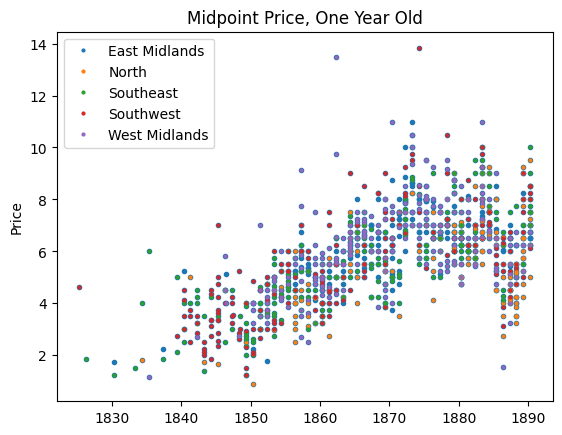

In [31]:
one_year_old_df = df[df["type_std"] == "one year old"]
plt.title("Midpoint Price, One Year Old") # add title
plt.xlabel("")  # add label to x-axis
plt.ylabel("Price")  # add label to y-axis
plt.scatter(one_year_old_df.datetime,one_year_old_df.price_midpoint, marker = '.')

# Color Scatterplot Points by Category: https://www.statology.org/matplotlib-scatterplot-color-by-value/
groups = one_year_old_df.groupby('region')
for name, group in groups:
    plt.plot(group.datetime, group.price_midpoint, marker='o', linestyle='', markersize=2, label=name)

plt.legend()
